# week2-work2 富士山下山問題

### 0.0.0(データの取得)

In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

numpy.set_printoptions — NumPy v1.16 Manual  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.set_printoptions.html

numpy.loadtxt — NumPy v1.16 Manual  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

### 0.0.1(データの確認)

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

### 1.1.1(解答)

Text(0, 0.5, 'elevation(m)')

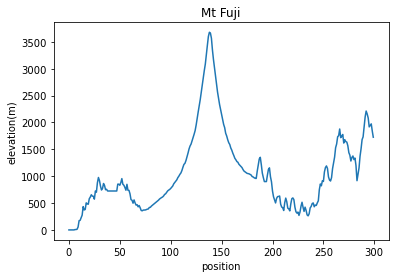

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fuji[:,0], fuji[:, 3])
ax.set_title("Mt Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation(m)")



## 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。
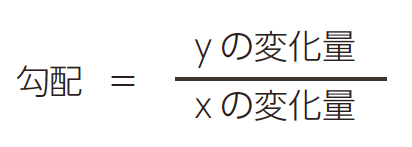

### 2.1.1(解答)

In [4]:
def gradient(point):
    dy = (fuji[point, 3] - fuji[point - 1, 3]) 
    dx = (fuji[point, 0] - fuji[point - 1, 0])
    ans_gradient = (dy / dx)
    return fuji[point, 3], ans_gradient

### 2.1.2(確認用)

In [5]:
place = 136
elevation, ans_gradient = gradient(place)

print(f"ポイント{place}の標高は、{elevation}mで、勾配は{ans_gradient:.1f}です。")

ポイント136の標高は、3434.59mで、勾配は168.4です。


## 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。  
数式で表すと  
「移動先の地点 = 今いる地点 $-α \times $今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。  
$α$は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

《実装上の注意》  

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

Python tutorial エラーと例外  
https://docs.python.org/ja/3/tutorial/errors.html


### 3.1.1(解答)

In [6]:
def next_point(now_point, h_parameter=0.2):
    elevation, ans_gradient = gradient(now_point)
    ans_next_point = now_point - h_parameter * ans_gradient
    return np.rint(ans_next_point)

### 3.1.2(確認用)


In [7]:
place = 136
print(f"現在地は{place}地点です、このペースで下山すると次は{int(next_point(place))}地点です。")

現在地は136地点です、このペースで下山すると次は102地点です。


## 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。  移動毎の地点はリストなどに記録して、これを関数の返り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。


《実装上の注意》  
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。



### 4.1.1(解答)

In [8]:
def descent(now_point, num, h_parameter=0.2):
    count = 0
    descent_data = [now_point]
    for i in range(num):
        now_point = int(next_point(now_point, h_parameter))
        if now_point <= 0:
            print(f"勾配が無く、平坦なポイント[0]地点に下山しました")
            descent_data.append(0)
            break
        elif now_point == descent_data[-1] :
            count += 1
            if count == 50:
                print(f"勾配が無く、平坦なポイント{descent_data[-1:]}地点に下山しました")
        else:
            descent_data.append(now_point)
    return descent_data

### 4.1.2(確認用)

In [9]:
print(descent(136, 10000))

勾配が無く、平坦なポイント[75]地点に下山しました
[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


## 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》  
断面図の中に移動した地点を点で表示する  
繰り返し毎の標高や勾配を折れ線グラフにする

### 5.1.1(解答)

勾配が無く、平坦なポイント[75]地点に下山しました


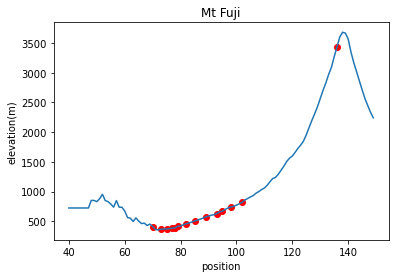

In [10]:
descent_data = descent(136, 10000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fuji[40:150,0,], fuji[40:150, 3])
ax.set_title("Mt Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation(m)")
ax.scatter(descent_data[:], fuji[descent_data[:], 3], color="red")



## 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》  
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

### 6.1.1(解答) 初期値はポイント25の地点

勾配が無く、平坦なポイント[43]地点に下山しました
[25, 36, 52, 37, 35, 43]


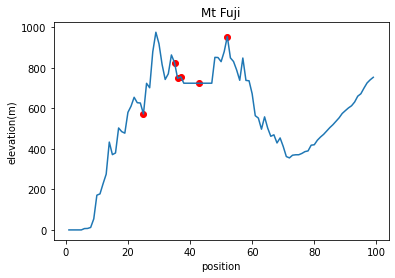

In [11]:
initial_value = 25
x0 = 1
x1 = 100

descent_data = descent(initial_value,100)
print(descent_data)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fuji[x0:x1,0,], fuji[x0:x1, 3])
ax.set_title("Mt Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation(m)")
ax.scatter(descent_data[:], fuji[descent_data[:], 3], color="red")

### 6.1.2(考察)

初期値に最も近い地点の標高のほうが初期値より高いため、初期値にプラスして地点を登ってしまっている。

### 6.2.1(解答) 初期値はポイント40の地点

勾配が無く、平坦なポイント[40]地点に下山しました
[40]


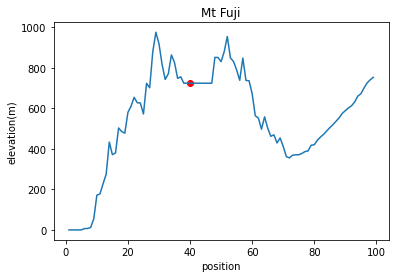

In [12]:
initial_value = 40
x0 = 1
x1 = 100

descent_data = descent(initial_value,100)
print(descent_data)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fuji[x0:x1,0,], fuji[x0:x1, 3])
ax.set_title("Mt Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation(m)")
ax.scatter(descent_data[:], fuji[descent_data[:], 3], color="red")

### 6.2.1(考察)

初期値の最も近い場所が同じ標高のため勾配が0となり、初期値から移動が出来なくなった。

### 6.3.1(解答) 初期値はポイント139の地点

[139, 142, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180]


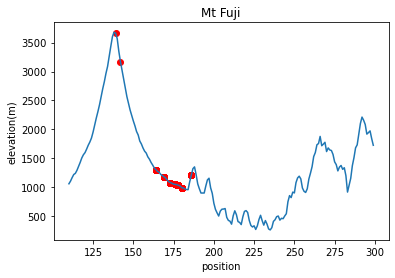

In [13]:
initial_value = 139
x0 = 110
x1 = 300

descent_data = descent(initial_value,100)
print(descent_data)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fuji[x0:x1,0,], fuji[x0:x1, 3])
ax.set_title("Mt Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation(m)")
ax.scatter(descent_data[:], fuji[descent_data[:], 3], color="red")

### 6.3.1(考察)

この地点から富士山の右側に下るルートをとる。

## 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータaを変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

### 7.1.1(解答) 初期値はポイント136の地点

勾配が無く、平坦なポイント[75]地点に下山しました
[136, 35, 58, 124, 83, 75]


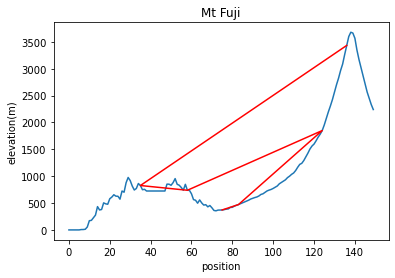

In [14]:
initial_value = 136
h_parameter = 0.6
x0 = 0
x1 = 150

descent_data = descent(initial_value, 100, h_parameter)
print(descent_data)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fuji[x0:x1,0,], fuji[x0:x1, 3])
ax.set_title("Mt Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation(m)")
ax.plot(descent_data[:], fuji[descent_data[:], 3], color="red")

### 7.2.1(解答) 初期値はポイント139の地点

[139, 148, 217, 239, 207, 202, 238, 221, 240, 233, 269, 250, 259, 158, 178, 184, 185, 103, 78, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72]


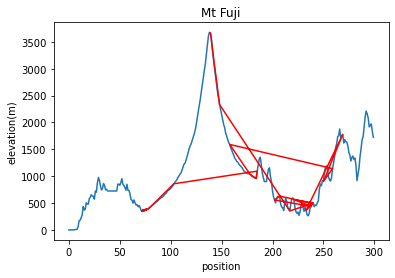

In [15]:
initial_value = 139
h_parameter = 0.6
x0 = 0
x1 = 300

descent_data = descent(initial_value, 100, h_parameter)
print(descent_data)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fuji[x0:x1,0,], fuji[x0:x1, 3])
ax.set_title("Mt Fuji")
ax.set_xlabel("position")
ax.set_ylabel("elevation(m)")
ax.plot(descent_data[:], fuji[descent_data[:], 3], color="red")